In [1]:
import pandas as pd ## Preparador de datos
import matplotlib.pyplot as plt ### Visualizador
import missingno as msno ### Para ver valores faltantes
import numpy as np ## Calculos matriciales
import seaborn as sns ### Estilizador y formateador de imagenes
import geopandas as gpd
from sklearn.preprocessing import LabelEncoder


In [61]:
shapefile_path = 'C:\\Users\\JohanStivenPaezBermu\\OneDrive - Asulado\\Python\\Python_MSc\\Tesis\\ESE_Capacidad_Instalada\\ESE_Capacidad_Instalada.shp'
# Carga el Shapefile
Mapa_Antioquia = gpd.read_file(shapefile_path)

#print(Mapa_Antioquia.head())

# CARGA DATOS DE SENSORES

In [62]:
df_Sensores = pd.read_csv("C:\\Users\\JohanStivenPaezBermu\\Downloads\\Datos_Tesis\\Precipitacion_2011_2023_ANT\\Consolidado_Precipitacion_Antioquia.csv")
#df_Sensores.shape ## (67172, 21)
df_Sensores.head(1)

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,Entidad,AreaOperativa,Departamento,Municipio,...,FechaSuspension,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
0,23085270,AEROPUERTO J.M. CORDOVA - AUT [23085270],6.168611,-75.426111,2131,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 01 - Antioquia-Chocó,Antioquia,Rionegro,...,NaN,PRECIPITACION,PT_10_TT_D,Precipitación total diaria (automática),Diaria,14/06/2014 00:00,68.46,50,NaN,900


In [63]:
df_Cod_DANE = pd.read_csv("C:\\Users\\JohanStivenPaezBermu\\Downloads\\Datos_Tesis\\COD_MUNICIPIOS.csv",encoding='latin1')
#df_Cod_DANE.shape # (1103, 5)

In [65]:
#df_Cod_DANE['codigo_DANE'] = df_Cod_DANE.apply(lambda row: ''.join(row[['cod_depto', 'cod_muni']]), axis=1)
longitud_municipio = 3
longitud_departamento = 2
df_Cod_DANE['cod_muni'] = df_Cod_DANE['cod_muni'].astype(str)
df_Cod_DANE['cod_muni'] = df_Cod_DANE['cod_muni'].apply(lambda x: x.zfill(longitud_municipio) if len(x) < longitud_municipio else x)

df_Cod_DANE['cod_depto'] = df_Cod_DANE['cod_depto'].astype(str)
df_Cod_DANE['cod_depto'] = df_Cod_DANE['cod_depto'].apply(lambda x: x.zfill(longitud_departamento) if len(x) < longitud_departamento else x)


In [66]:

df_Cod_DANE['codigo_DANE'] = df_Cod_DANE.apply(lambda row: ''.join([str(row['cod_depto']), str(row['cod_muni'])]), axis=1)
df_Cod_DANE.head(2)

,cod_depto,cod_muni,Departamento,Municipio,cobertura,codigo_DANE
0,05,001,Antioquia,Medellín,77,05001
1,05,079,Antioquia,Barbosa,77,05079


In [69]:
df_DIAN_Sensores = pd.merge(df_Cod_DANE, df_Sensores, on='Municipio',how='inner')
df_DIAN_Sensores.head(2)
#df_DIAN_Sensores.shape  #(84045, 25)

,cod_depto,cod_muni,Departamento_x,Municipio,cobertura,codigo_DANE,CodigoEstacion,NombreEstacion,Latitud,Longitud,...,FechaSuspension,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
0,05,001,Antioquia,Medellín,77,05001,27015330,OLAYA HERRERA - AUT [27015330],6.224679,-75.588225,...,NaN,PRECIPITACION,PT_10_TT_D,Precipitación total diaria (automática),Diaria,01/01/2017 00:00,0.0,50,NaN,900
1,05,001,Antioquia,Medellín,77,05001,27015330,OLAYA HERRERA - AUT [27015330],6.224679,-75.588225,...,NaN,PRECIPITACION,PT_10_TT_D,Precipitación total diaria (automática),Diaria,02/01/2017 00:00,0.0,50,NaN,900


In [71]:
df1_duplicados = df_Cod_DANE[df_Cod_DANE.duplicated('Municipio')]
print("Duplicados en df1:")
print(df1_duplicados)

# Verificar duplicados en df2
df2_duplicados = df_Sensores[df_Sensores.duplicated('Municipio')]
print("Duplicados en df2:")
print(df2_duplicados)

Duplicados en df1:
     cod_depto cod_muni  Departamento    Municipio cobertura codigo_DANE
200         25      258  Cundinamarca     El Peñón       302       25258
206         25      402  Cundinamarca      La Vega       302       25402
227         44      874    La Guajira   Villanueva       302       44874
244         52      612        Nariño     Ricaurte       302       52612
263         68      077     Santander      Barbosa       302       68077
...        ...      ...           ...          ...       ...         ...
1088        86      757      Putumayo   San Miguel     1000+       86757
1089        86      760      Putumayo     Santiago     1000+       86760
1092        88      564    San Andrés  Providencia     1000+       88564
1094        95      015      Guaviare      Calamar     1000+       95015
1096        95      200      Guaviare   Miraflores     1000+       95200

[82 rows x 6 columns]
Duplicados en df2:
       CodigoEstacion                            NombreEstacion

In [42]:
Est_Unicas = df_Sensores['NombreEstacion'].unique() # Estaciones Unicas
Est_Unicas
#conteo = datos_relacionados['Nombre de la estación'].value_counts().reset_index()

array(['AEROPUERTO J.M. CORDOVA - AUT [23085270]',
       'ARAGON - AUT [27015320]', 'ARGELIA ANTIOQUIA - AUT [23050420]',
       'BOLOMBOLO [26207080]', 'CANTERAS - AUT [23087210]',
       'CHIGORODO - AUT [12015110]', 'HACIENDA COTOVE - AUT [26225060]',
       'JERICO - AUT [26185030]', 'LA COQUERA - AUT [26247020]',
       'LA ESPERANZA NECHI [27037010]', 'LA SELVA - AUT [23085260]',
       'LAS CAMELIAS - AUT [26247050]', 'MACEO - AUT [23105070]',
       'METROMEDELLIN - AUT [27015310]', 'OLAYA HERRERA - AUT [27015330]',
       'PAJARITO - AUT [27015290]', 'PARAMO BELMIRA - AUT [27015280]',
       'PISTA INDIRA - AUT [12015100]', 'PUERTO BERRIO - AUT [23097030]',
       'PUERTO VALDIVIA - AUT [26237040]', 'QUITASUENO  - AUT [26187040]',
       'SAN JUAN NECHI - AUT [27037030]', 'SAN MIGUEL - AUT [23057140]',
       'SANTA BARBARA - AUT [26185050]',
       'SANTA ISABEL VALDIVIA - AUT [26255030]',
       'VEGACHI - AUT [23105060]'], dtype=object)

In [43]:
conteo = df_Sensores.groupby(['NombreEstacion', 'Municipio']).size()
conteo


NombreEstacion                            Municipio            
AEROPUERTO J.M. CORDOVA - AUT [23085270]  Rionegro                 3378
ARAGON - AUT [27015320]                   Santa Rosa De Osos       2283
ARGELIA ANTIOQUIA - AUT [23050420]        Argelia                  4087
BOLOMBOLO [26207080]                      Venecia                  2118
CANTERAS - AUT [23087210]                 Puerto Nare              4102
CHIGORODO - AUT [12015110]                Chigorodó                4258
HACIENDA COTOVE - AUT [26225060]          Santa Fe De Antioquia    2282
JERICO - AUT [26185030]                   Jericó                   1128
LA COQUERA - AUT [26247020]               Caucasia                 2284
LA ESPERANZA NECHI [27037010]             Nechí                    2386
LA SELVA - AUT [23085260]                 Rionegro                 4459
LAS CAMELIAS - AUT [26247050]             Tarazá                   1706
MACEO - AUT [23105070]                    Yolombó                  4520


In [ ]:
df_Sensores['fecha'] = pd.to_datetime(df['fecha'], format='%m/%d/%Y %H:%M')


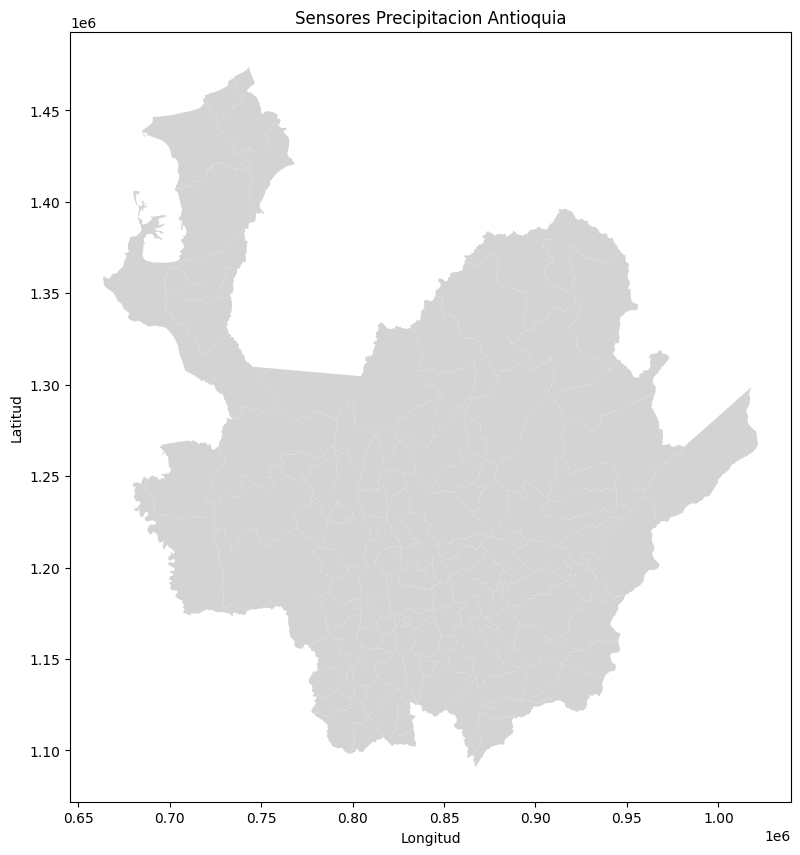

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
Mapa_Antioquia.plot(ax=ax, color='lightgrey') ### Nueva
#ventas_geo.plot(column="cantidad", cmap="YlGnBu", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
plt.title("Sensores Precipitacion Antioquia")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()